# **Loading Required Libraries**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime as dt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Enable inline plotting
%matplotlib inline

# **Loading the Dataset in Kaggle**

In [2]:
# Loading dataset 
file_path = '/kaggle/input/online-retail-e-commerce-data/online_retail_II.xlsx'
df_2009 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_2010 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Combining both datasets into one
df = pd.concat([df_2009, df_2010])

# Displaying dataset structure
print("✅ Dataset Loaded Successfully!")
print(f"Dataset Shape: {df.shape}")  # Number of rows and columns
df.head()  # Display first few rows

✅ Dataset Loaded Successfully!
Dataset Shape: (1067356, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# **Data Cleaning and Preprocessing**

In [3]:
#Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Invoice           145
StockCode         145
Description      4523
Quantity          145
InvoiceDate       145
Price             145
Customer ID    242992
Country           145
dtype: int64


In [4]:
#droping rows where 'Customer ID' or 'InvoiceDate' is missing
df_cleaned = df.dropna(subset=['Customer ID', 'InvoiceDate'])
print(f"Dataset Shape After Removing Missing Values: {df_cleaned.shape}")

Dataset Shape After Removing Missing Values: (824364, 8)


In [5]:
# Removing duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print(f"Dataset Shape After Removing Duplicates: {df_cleaned.shape}")

Dataset Shape After Removing Duplicates: (797885, 8)


In [6]:
#Converting Customer ID to integer
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int)

# Converting InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

#creating a Total Price column
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']

#Displaying the first few rows
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [7]:
# Removing rows with negative quantity or price
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]
print(f"Dataset Shape After Removing Negative Transactions: {df_cleaned.shape}")

Dataset Shape After Removing Negative Transactions: (779425, 9)


In [8]:
print(f"Final Dataset Shape: {df_cleaned.shape}")  # Final check
df_cleaned.info()  # Summary of dataset after cleaning

Final Dataset Shape: (779425, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  float64       
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  int64         
 7   Country      779425 non-null  object        
 8   TotalPrice   779425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.5+ MB


# **RFM Analysis (Recency, Frequency, Monetary)**

In [9]:
#Define Reference Date(max date in dataset)
reference_date = df_cleaned['InvoiceDate'].max()
print("Reference Date:", reference_date)

Reference Date: 2011-12-09 12:50:00


In [10]:
# Computing RFM metrics
rfm_df = df_cleaned.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency (number of unique purchases)
    'TotalPrice': 'sum'  # Monetary (total spend)
}).reset_index()

#Lets rename columns
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)

#Displaying results
from IPython.display import display  # Import display from IPython

display(rfm_df)  # Show the dataframe in the output

,Customer ID,Recency,Frequency,Monetary
0,12346,325,12,77556.46
1,12347,1,8,4921.53
2,12348,74,5,2019.40
3,12349,18,4,4428.69
4,12350,309,1,334.40
...,...,...,...,...
5873,18283,3,22,2664.90
5874,18284,431,1,461.68
5875,18285,660,1,427.00
5876,18286,476,2,1296.43


In [11]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5878 non-null   int64  
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 183.8 KB


In [12]:
rfm_df.describe()

,Customer ID,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,200.331916,6.289384,2955.904095
std,1715.572666,209.338707,13.009406,14440.852688
min,12346.000000,0.000000,1.000000,2.950000
25%,13833.250000,25.000000,1.000000,342.280000
50%,15314.500000,95.000000,3.000000,867.740000
75%,16797.750000,379.000000,7.000000,2248.305000
max,18287.000000,738.000000,398.000000,580987.040000


In [13]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

In [14]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

**Distribution of Recency, Frequency, and Monetary Value**

We will first plot histograms for each RFM metric to understand their distribution



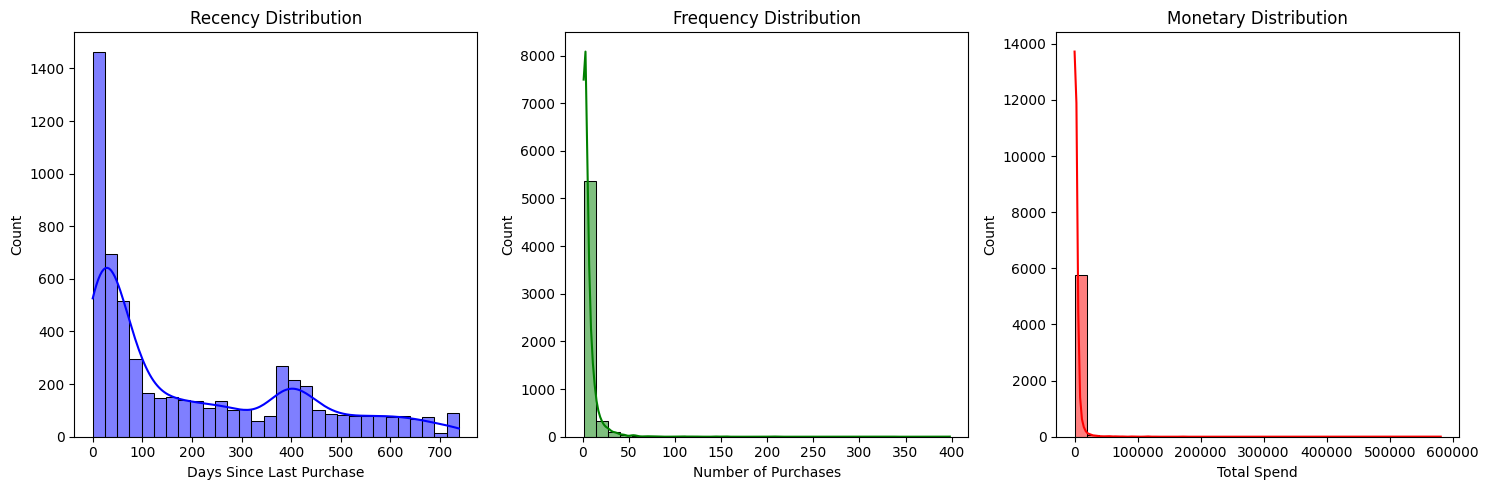

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Lets set figure size
plt.figure(figsize=(15, 5))

#Ploting distribution of Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

#Ploting distribution of Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Ploting distribution of Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, color='red')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

**Customer Segmentation Using RFM Scores**

Now, we will group customers based on their RFM Scores and visualize them

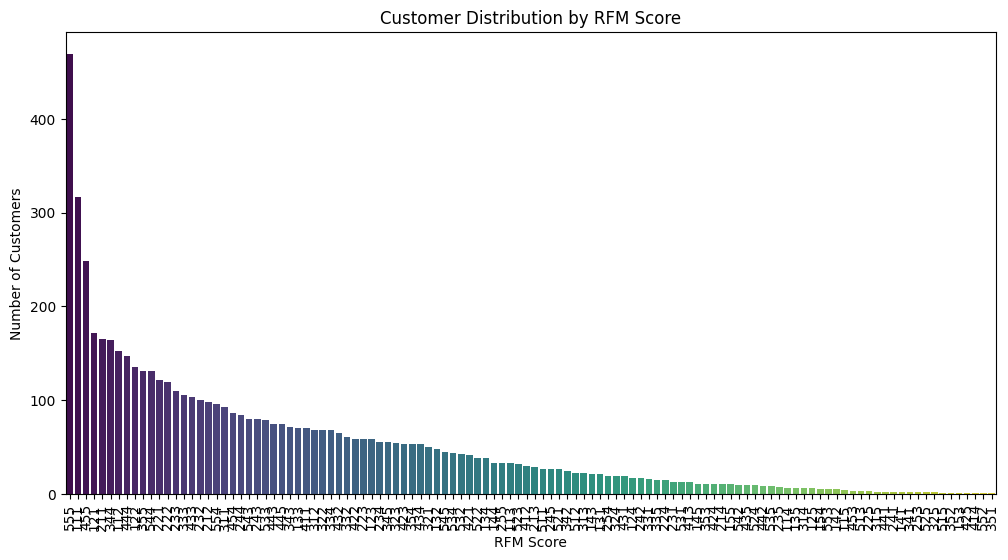

In [16]:
# Counting customers per RFM Score
rfm_counts = rfm_df['RFM_Score'].value_counts().reset_index()
rfm_counts.columns = ['RFM Score', 'Customer Count']

#Ploting RFM Score Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='RFM Score', y='Customer Count', data=rfm_counts, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Customer Distribution by RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

**Customer Segmentation Heatmap**

We can visualise customer segmentation by analysing Recency vs. Frequency and Monetary vs. Frequency

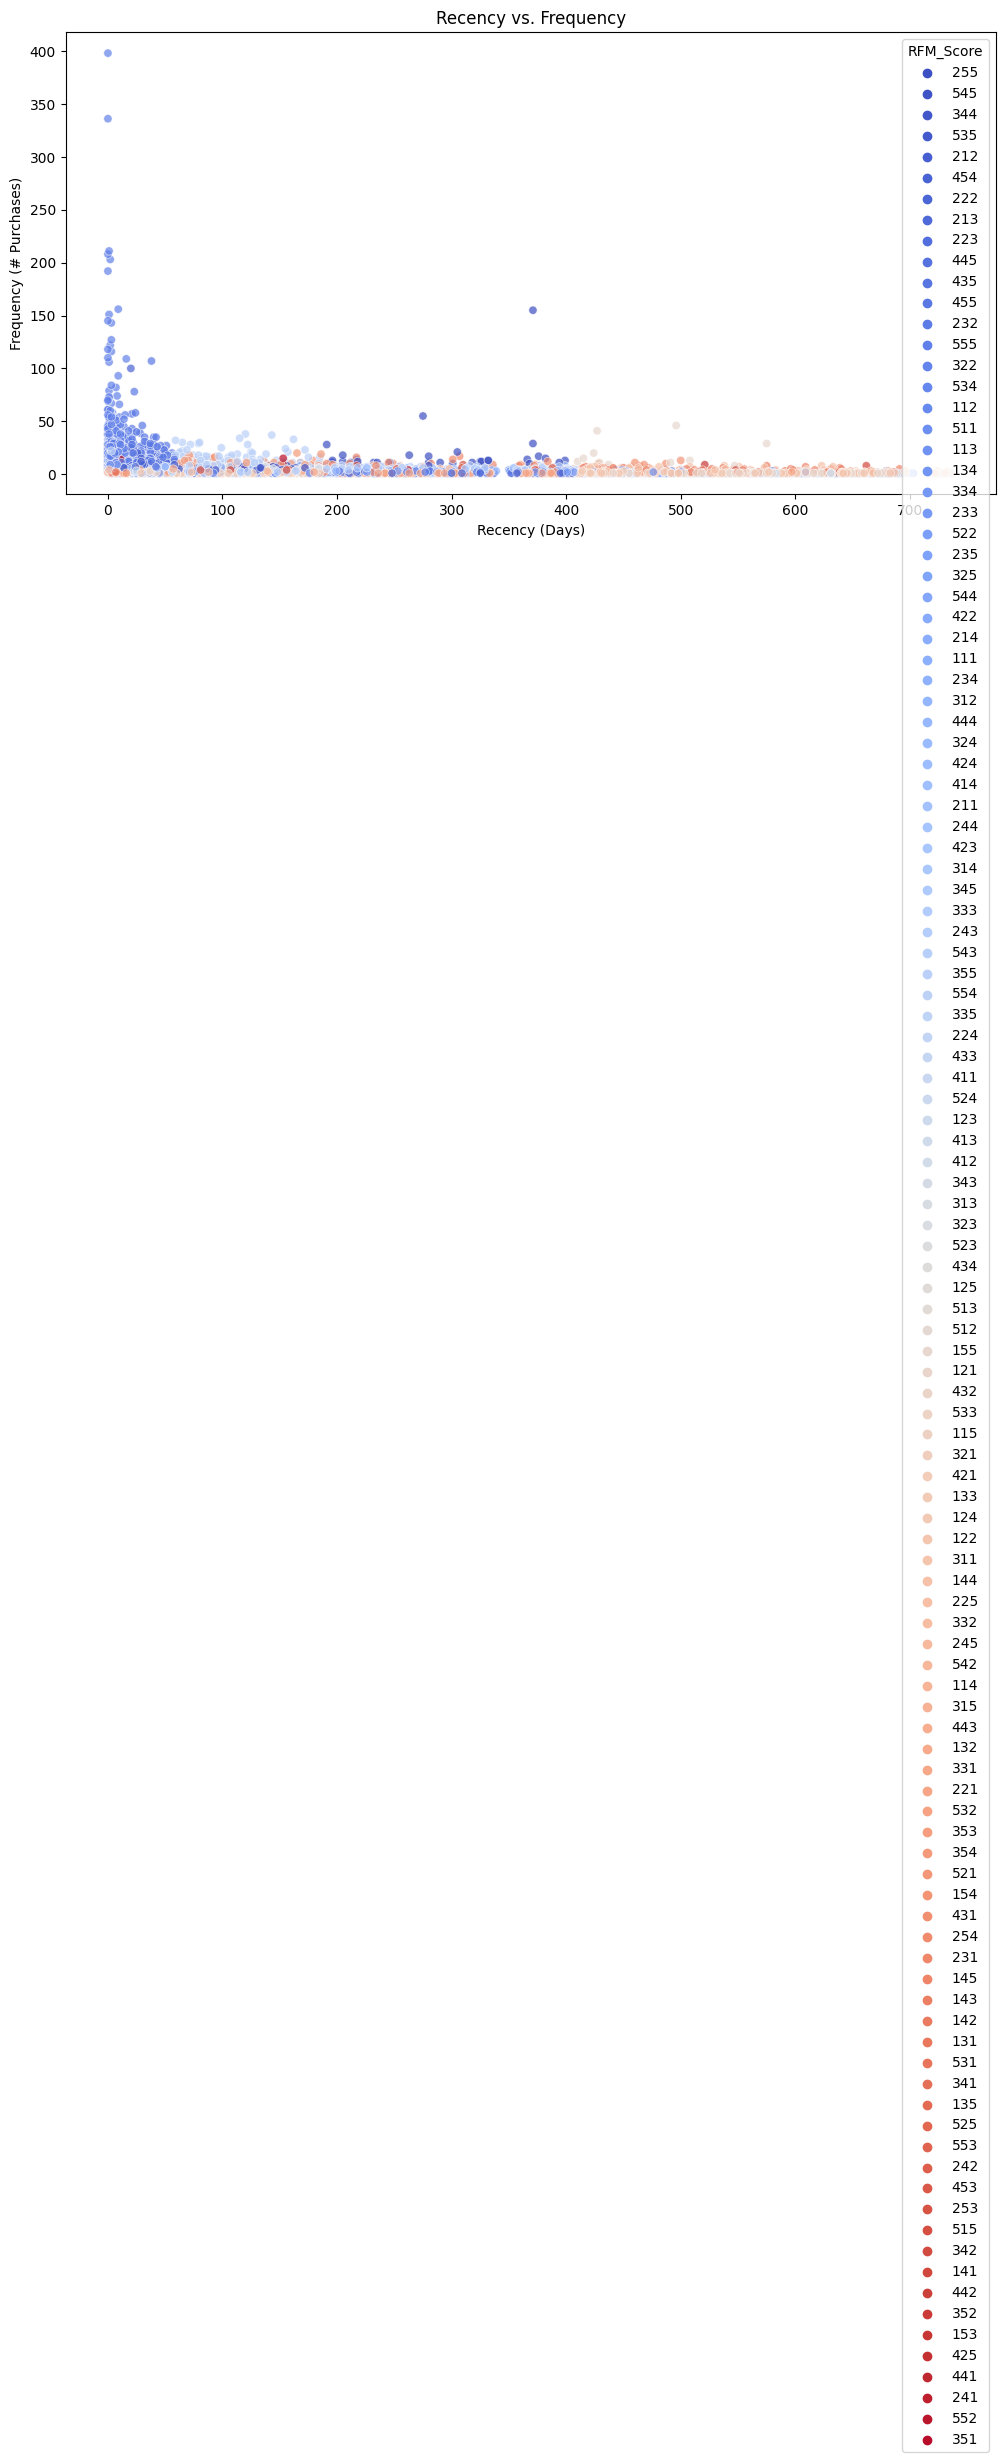

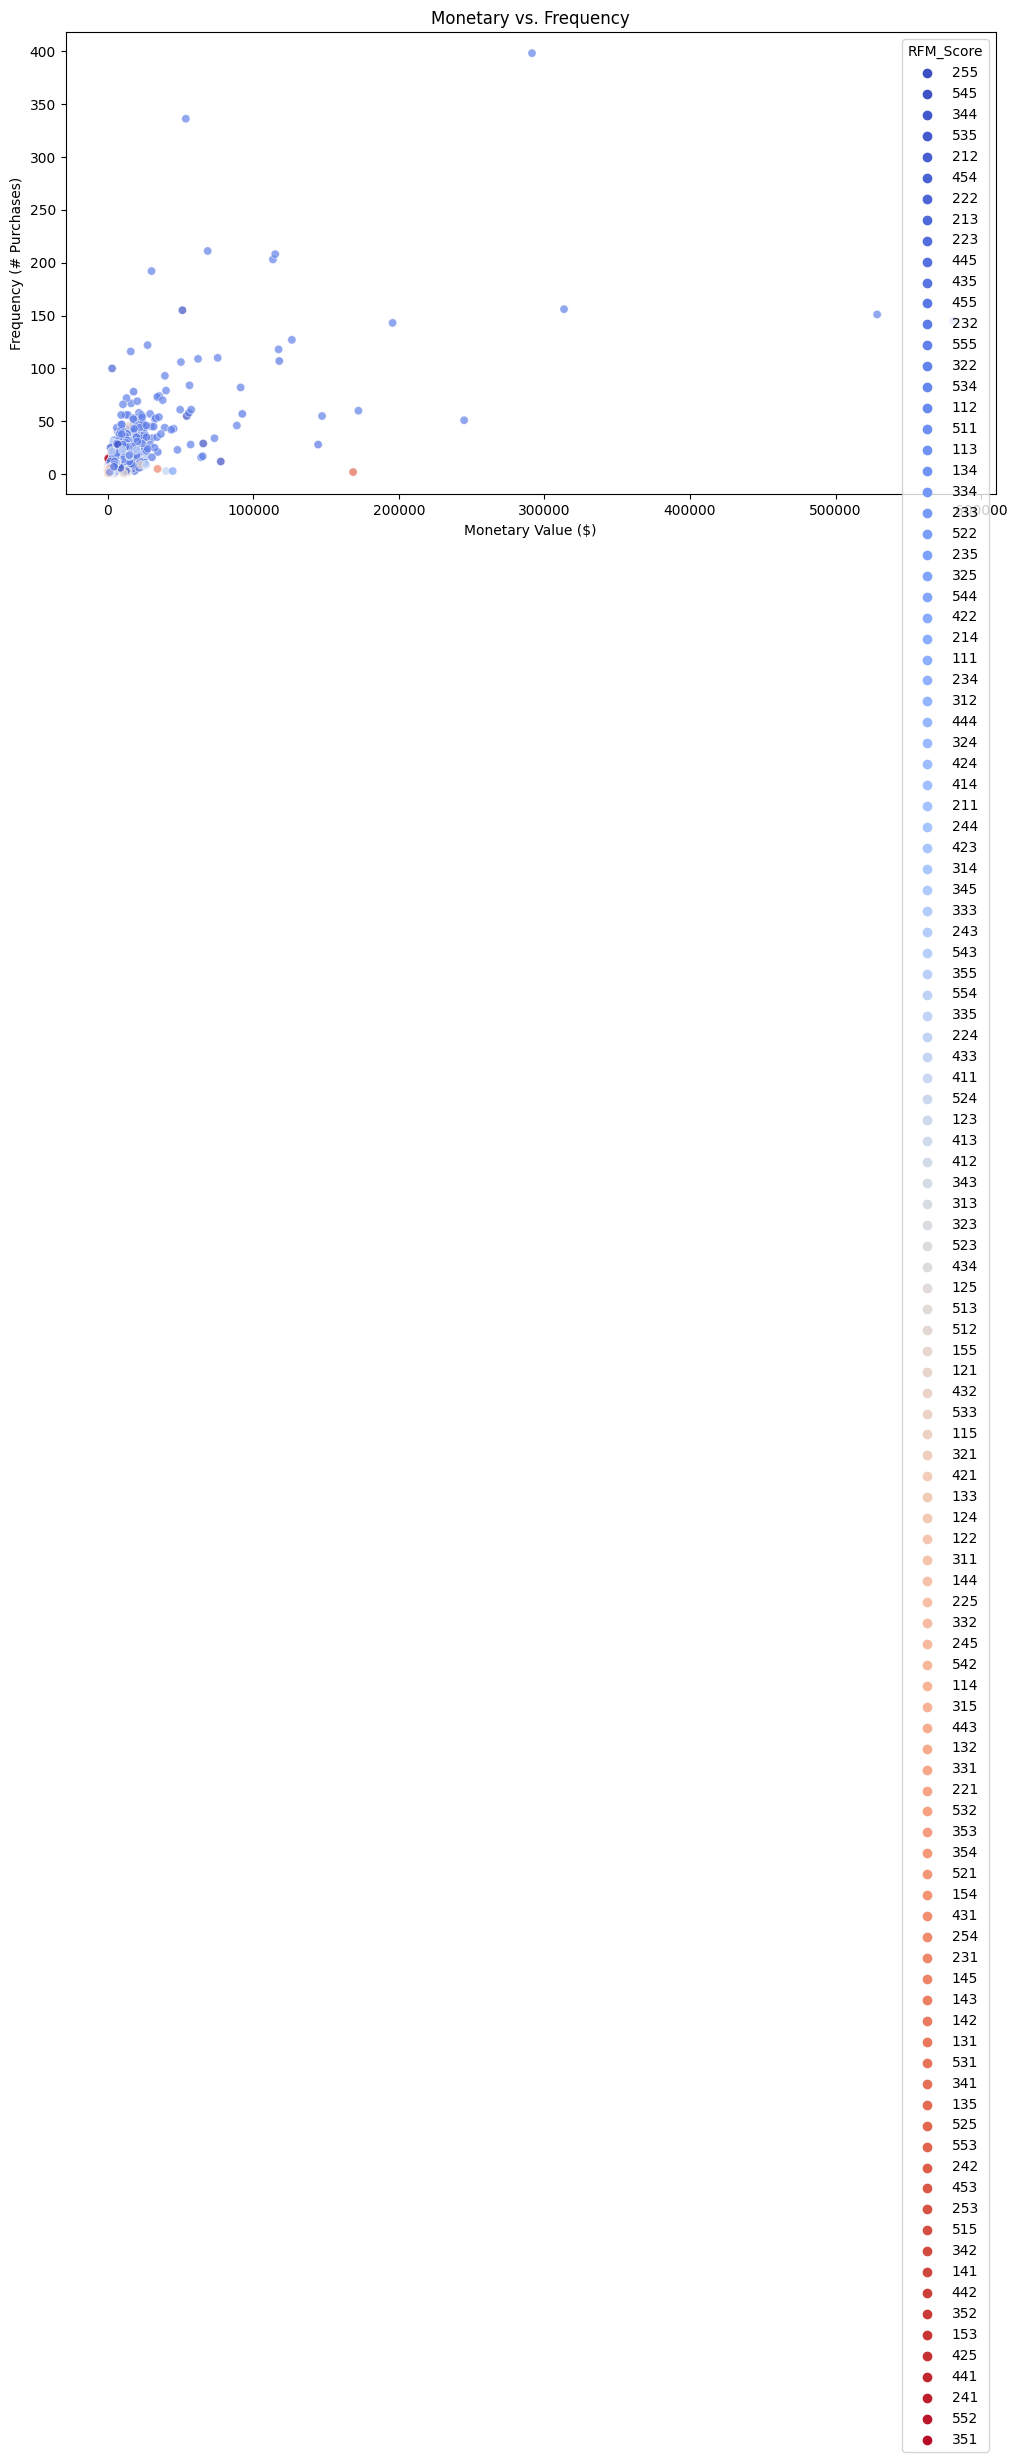

In [17]:
# Scatter Plot: Recency vs Frequency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='RFM_Score', data=rfm_df, palette='coolwarm', alpha=0.7)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (# Purchases)')
plt.show()

#Scatter Plot: Monetary vs Frequency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue='RFM_Score', data=rfm_df, palette='coolwarm', alpha=0.7)
plt.title('Monetary vs. Frequency')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency (# Purchases)')
plt.show()

**Determining Optimal Number of Clusters (Elbow Method)**

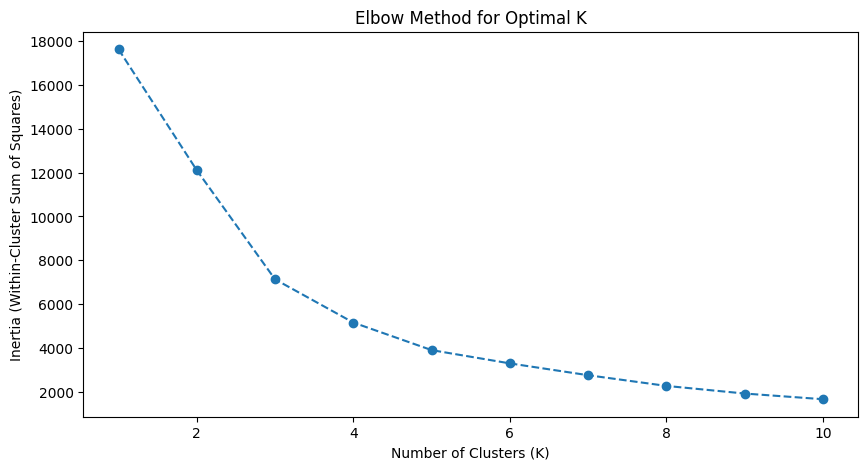

In [18]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

#Preparing data for clustering
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Normalising data (Standardization for better clustering performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

#Applying K-Means clustering with different K values
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Lets plot Elbow Method Graph
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# **Apply K-Means Clustering**

Cluster
0    3841
1    1998
3      35
2       4
Name: count, dtype: int64


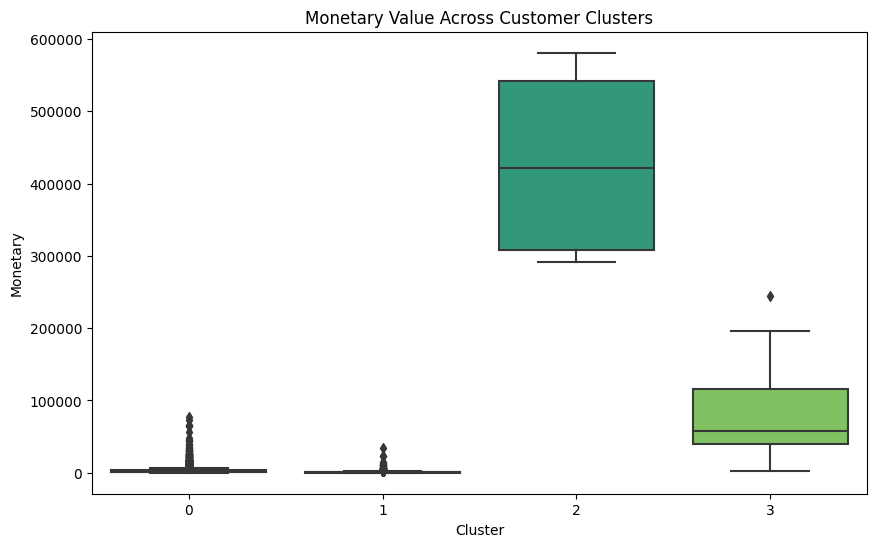

In [19]:
# Set K value (Based on the Elbow Method result)
k = 4  # Adjust this value based on the elbow method graph

# Applying K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

#Displaying cluster distribution
print(rfm_df['Cluster'].value_counts())

# Visualising clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, palette='viridis')
plt.title("Monetary Value Across Customer Clusters")
plt.show()

**Analysing Customer Segments**

In [20]:
# Summarizing Clusters
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'sum']
}).round(2)

#Displaying the summary
print(cluster_summary)

        Recency        Frequency          Monetary                        
           mean median      mean median       mean     median          sum
Cluster                                                                   
0         66.01   40.0      7.31    5.0    2946.45    1328.55  11317307.62
1        462.03  429.0      2.21    1.0     748.54     372.60   1495576.92
2          2.50    0.5    212.50  153.5  428612.00  421020.07   1714447.99
3         24.94    3.0    103.71   84.0   81356.34   57215.33   2847471.73


**Computing LTV Metrics**

In [21]:
# Calculating Average Order Value (AOV)
AOV = rfm_df['Monetary'].sum() / rfm_df['Frequency'].sum()

# Calculating Purchase Frequency
purchase_frequency = rfm_df['Frequency'].sum() / len(rfm_df)

#Calculating Repeat Rate & Churn Rate
repeat_rate = rfm_df[rfm_df['Frequency'] > 1].shape[0] / len(rfm_df)
churn_rate = 1 - repeat_rate

# Expecteded Customer Lifespan
expected_customer_lifespan = 1 / churn_rate

#Printing Metrics
print(f"AOV: {AOV:.2f}, Purchase Frequency: {purchase_frequency:.2f}, Churn Rate: {churn_rate:.4f}")

AOV: 469.98, Purchase Frequency: 6.29, Churn Rate: 0.2761


**Compute Customer LTV**

In [22]:
#Computing LTV for each customer
rfm_df['LTV'] = rfm_df['Monetary'] * purchase_frequency * expected_customer_lifespan

# Displaying LTV values
print(rfm_df[['Customer ID', 'Cluster', 'LTV']].head())

   Customer ID  Cluster           LTV
0        12346        0  1.766596e+06
1        12347        0  1.121035e+05
2        12348        0  4.599827e+04
3        12349        0  1.008775e+05
4        12350        1  7.617026e+03


**Visualising LTV Across Clusters**

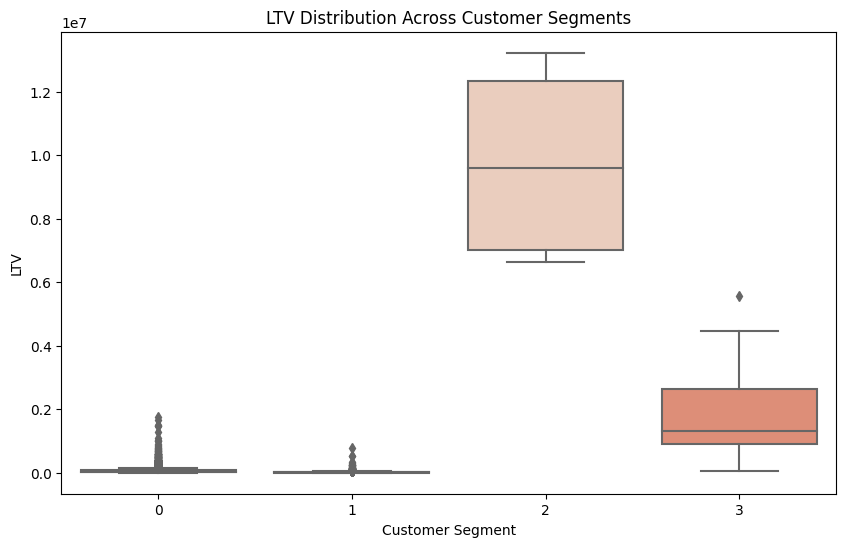

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for LTV across segments
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='LTV', data=rfm_df, palette='coolwarm')
plt.title("LTV Distribution Across Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("LTV")
plt.show()

**Analyze LTV Insights**

In [24]:
# Summarizing LTV across clusters
ltv_summary = rfm_df.groupby('Cluster')['LTV'].agg(['mean', 'median', 'min', 'max']).round(2)
print(ltv_summary)

               mean      median         min          max
Cluster                                                 
0          67114.75    30261.96      141.22   1766595.67
1          17050.32     8487.27       67.20    776628.26
2        9763004.89  9590074.53  6638038.15  13233832.34
3        1853149.94  1303261.57    65299.14   5575741.80
